<a href="https://colab.research.google.com/github/shirinlatifi/pe-project/blob/master/OilVisco_MLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [15]:
#load dataset
# X: Input features
# y: Target values

df = pd.read_excel('oil visco.xlsx')

In [ ]:
df

In [17]:
df['P'] = df['P'].fillna(df['P'].mean())

In [18]:
df['T'] = df['T'].fillna(df['T'].mean())

In [19]:
df.dropna(inplace=True)

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 495 entries, 0 to 494
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   T       495 non-null    float64
 1   P       495 non-null    float64
 2   Visco   495 non-null    float64
dtypes: float64(3)
memory usage: 11.7 KB


In [22]:
df.corr()['Visco']

T       -0.091610
P       -0.005034
Visco    1.000000
Name: Visco, dtype: float64

In [ ]:
import seaborn as sns
sns.scatterplot(data=df, x='P', y='Visco', alpha=0.3)

In [ ]:
sns.scatterplot(data=df, x='T', y='Visco', alpha=0.3)

In [26]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df.drop('Visco', axis=1), df['Visco'], test_size=0.2, random_state=42)

In [27]:
# Standardize the input features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
y_train_scaled = scaler.fit_transform(np.array(y_train).reshape(-1,1))
y_test_scaled = scaler.transform(np.array(y_test).reshape(-1,1))

In [29]:
X_train_scaled.max() , X_train_scaled.min()

(3.2104874606392633, -2.123976119618019)

In [30]:
X_test_scaled.max() , X_test_scaled.min()

(3.2104874606392633, -2.123976119618019)

In [32]:
y_train_scaled.max() , y_train_scaled.min()

(19.53622221625667, -0.1070889528136466)

In [ ]:
X_train_scaled

In [34]:
X_train_scaled.shape

(396, 2)

In [56]:
X_train_scaled.shape[0] , X_train_scaled.shape[1]

(396, 2)

In [41]:
# Build the MLP model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation='relu', input_dim=X_train_scaled.shape[1]),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1)  # Single output neuron for regression
])

In [43]:
# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

In [45]:
# Train the model
model.fit(X_train_scaled, y_train, epochs=300, batch_size=32, validation_split=0.2)

Epoch 1/300
10/10 [==============================] - 0s 10ms/step - loss: 2.4324 - val_loss: 18530.4277
Epoch 2/300
10/10 [==============================] - 0s 7ms/step - loss: 2.3972 - val_loss: 18524.8438
Epoch 3/300
10/10 [==============================] - 0s 7ms/step - loss: 2.4318 - val_loss: 18522.4844
Epoch 4/300
10/10 [==============================] - 0s 10ms/step - loss: 2.4172 - val_loss: 18519.7070
Epoch 5/300
10/10 [==============================] - 0s 6ms/step - loss: 2.4134 - val_loss: 18522.4844
Epoch 6/300
10/10 [==============================] - 0s 7ms/step - loss: 2.4009 - val_loss: 18529.3125
Epoch 7/300
10/10 [==============================] - 0s 11ms/step - loss: 2.4138 - val_loss: 18524.5391
Epoch 8/300
10/10 [==============================] - 0s 8ms/step - loss: 2.4327 - val_loss: 18515.3809
Epoch 9/300
10/10 [==============================] - 0s 9ms/step - loss: 2.4039 - val_loss: 18524.8340
Epoch 10/300
10/10 [==============================] - 0s 15ms/step - l

In [46]:
# Evaluate the model on the test set
loss = model.evaluate(X_test_scaled, y_test)
print("Test loss:", loss)

4/4 [==============================] - 0s 2ms/step - loss: 10819.4619
Test loss: 10819.4619140625


In [47]:
# Make predictions
predictions = model.predict(X_test_scaled)

4/4 [==============================] - 0s 2ms/step


In [ ]:
predictions

# accuracy

In [62]:
from sklearn.metrics import mean_absolute_error , mean_squared_error
mse = mean_squared_error(y_test_scaled, predictions)
mse

12.91466786742896

In [52]:
mean_absolute_error(y_test_scaled, predictions)

2.875103745013622

In [63]:
rmse = mean_squared_error(y_test_scaled, predictions, squared =False)
rmse

3.5936983550972887

#visualization

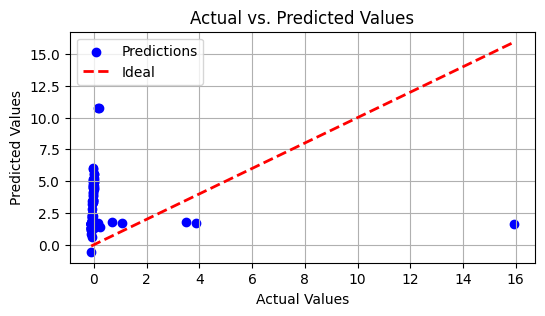

In [59]:
import numpy as np
import matplotlib.pyplot as plt

# Plotting the actual test data and predictions
plt.figure(figsize=(6,3))
plt.scatter(y_test_scaled, predictions, color='blue', label='Predictions')
plt.plot([min(y_test_scaled), max(y_test_scaled)], [min(y_test_scaled), max(y_test_scaled)], color='red', linestyle='--', linewidth=2, label='Ideal')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values')
plt.legend()
plt.grid(True)
plt.show()

#RMSE MSE plot

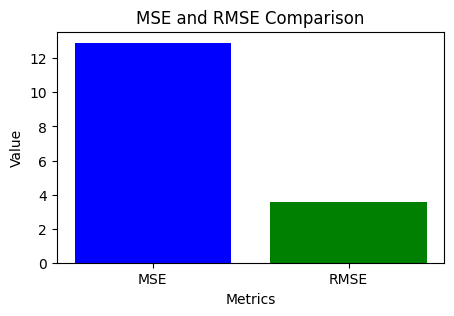

In [64]:
# Create labels and values for the bar plot
metrics = ['MSE', 'RMSE']
values = [mse, rmse]

# Plotting the bar plot
plt.figure(figsize=(5,3))
plt.bar(metrics, values, color=['blue', 'green'])
plt.xlabel('Metrics')
plt.ylabel('Value')
plt.title('MSE and RMSE Comparison')
plt.show()